# 1. Obejektif

Sesuai ketentuan Wrangling and SQL Project Class yaitu minimal tiga objektif dan dua tabel yang telah ditentukan juga :

1. Jenis pembayaran apa yang paling banyak digunakan
2. Tren penjualan pada tahun 2018
3. lima kategori penjualan produk terendah dan tertinggi

Pada project kali ini menggunakan lima table berikut :

1. olist_order_dataset
2. olist_order_payments_dataset
3. olist_products_dataset
4. product_category_name_translation
5. olist_order_items_dataset

In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
conn = sqlite3.connect('olist.db')
list_table = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
list_table

,name
0,olist_order_customer_dataset
1,olist_order_dataset
2,olist_order_reviews_dataset
3,olist_order_payments_dataset
4,olist_order_items_dataset
5,olist_products_dataset
6,olist_sellers_dataset
7,olist_geolocation_dataset
8,product_category_name_translation


In [4]:
#table
customer = pd.read_sql_query("""SELECT*FROM olist_order_customer_dataset;""", conn)
order = pd.read_sql_query("""SELECT*FROM olist_order_dataset;""", conn)
review = pd.read_sql_query("""SELECT*FROM olist_order_reviews_dataset;""", conn)
payment = pd.read_sql_query("""SELECT*FROM olist_order_payments_dataset;""", conn)
item = pd.read_sql_query("""SELECT*FROM olist_order_items_dataset;""", conn)
product = pd.read_sql_query("""SELECT*FROM olist_products_dataset;""", conn)
seller = pd.read_sql_query("""SELECT*FROM olist_sellers_dataset;""", conn)
location = pd.read_sql_query("""SELECT*FROM olist_geolocation_dataset;""", conn)
category = pd.read_sql_query("""SELECT*FROM product_category_name_translation;""", conn)


# 2. Cleaning Data

## 2.1 Category

In [5]:
category.head()

,index,product_category_name,product_category_name_english
0,0,beleza_saude,health_beauty
1,1,informatica_acessorios,computers_accessories
2,2,automotivo,auto
3,3,cama_mesa_banho,bed_bath_table
4,4,moveis_decoracao,furniture_decor


In [6]:
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          71 non-null     int64 
 1   product_category_name          71 non-null     object
 2   product_category_name_english  71 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.8+ KB


### 2.1.1 Identifikasi Missing Value

In [7]:
(category.isna().sum()/len(category)*100).sort_values(ascending=False)

index                            0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

### 2.1.2 Identifikasi Duplikasi

In [8]:
category[category.duplicated(keep=False)]

,index,product_category_name,product_category_name_english


### 2.1.3 Identifikasi Outlier

In [9]:
category.describe(include='all')

,index,product_category_name,product_category_name_english
count,71.000000,71,71
unique,NaN,71,71
top,NaN,beleza_saude,health_beauty
freq,NaN,1,1
mean,35.000000,NaN,NaN
std,20.639767,NaN,NaN
min,0.000000,NaN,NaN
25%,17.500000,NaN,NaN
50%,35.000000,NaN,NaN
75%,52.500000,NaN,NaN


tidak perlu dilakukan handling outlier karena hanya ada kolom dengan nilai diskrit. Outlier handling biasanya relevan untuk kolom-kolom dengan data numerik kontinu

### 2.1.3 Identifikasi Inkonsisten

In [10]:
category['product_category_name_english'].unique()

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

In [11]:
category['product_category_name'].unique()

array(['beleza_saude', 'informatica_acessorios', 'automotivo',
       'cama_mesa_banho', 'moveis_decoracao', 'esporte_lazer',
       'perfumaria', 'utilidades_domesticas', 'telefonia',
       'relogios_presentes', 'alimentos_bebidas', 'bebes', 'papelaria',
       'tablets_impressao_imagem', 'brinquedos', 'telefonia_fixa',
       'ferramentas_jardim', 'fashion_bolsas_e_acessorios',
       'eletroportateis', 'consoles_games', 'audio', 'fashion_calcados',
       'cool_stuff', 'malas_acessorios', 'climatizacao',
       'construcao_ferramentas_construcao',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'construcao_ferramentas_jardim', 'fashion_roupa_masculina',
       'pet_shop', 'moveis_escritorio', 'market_place', 'eletronicos',
       'eletrodomesticos', 'artigos_de_festas', 'casa_conforto',
       'construcao_ferramentas_ferramentas', 'agro_industria_e_comercio',
       'moveis_colchao_e_estofado', 'livros_tecnicos', 'casa_construcao',
       'instrumentos_musicais', 'm

In [12]:
customer_clean = customer

## 2.2 Order

In [13]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   index                          99441 non-null  int64 
 1   order_id                       99441 non-null  object
 2   customer_id                    99441 non-null  object
 3   order_status                   99441 non-null  object
 4   order_purchase_timestamp       99441 non-null  object
 5   order_approved_at              99281 non-null  object
 6   order_delivered_carrier_date   97658 non-null  object
 7   order_delivered_customer_date  96476 non-null  object
 8   order_estimated_delivery_date  99441 non-null  object
dtypes: int64(1), object(8)
memory usage: 6.8+ MB


In [14]:
#mengubah kolom dalam DataFrame order menjadi tipe data datetime

order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])

### 2.2.1 Identifikasi Missing Value

In [15]:
order = order.dropna()
(order.isna().sum()/len(order)*100).sort_values(ascending=False)

index                            0.0
order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
dtype: float64

### 2.2.2 Identifikasi Duplikasi

In [16]:
order[order.duplicated(keep=False)]

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### 2.2.3 Identifikasi Outlier

In [17]:
order.describe(include='all')

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461.000000,96461,96461,96461,96461,96461,96461,96461,96461
unique,NaN,96461,96461,2,95939,88272,80100,95649,445
top,NaN,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,NaN,1,1,96455,3,9,47,3,507
first,NaN,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
last,NaN,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00
mean,49713.841750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,28713.381375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24852.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


tidak perlu dilakukan handling outlier karena hanya ada kolom dengan nilai diskrit. Outlier handling biasanya relevan untuk kolom-kolom dengan data numerik kontinu

In [18]:
#mengubah nama variabel tabel orders
order_clean = order

## 2.3 Item

In [19]:
#cek info
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   index                112650 non-null  int64  
 1   order_id             112650 non-null  object 
 2   order_item_id        112650 non-null  int64  
 3   product_id           112650 non-null  object 
 4   seller_id            112650 non-null  object 
 5   shipping_limit_date  112650 non-null  object 
 6   price                112650 non-null  float64
 7   freight_value        112650 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 6.9+ MB


### 2.3.1 Identifikasi Missing Value

In [20]:
(item.isna().sum()/len(item)*100).sort_values(ascending=True)

index                  0.0
order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

### 2.3.2 Identifikasi Duplikasi

In [21]:
item[item.duplicated(keep=False)]

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### 2.3.3 Identifikasi Outlier

In [22]:
item.describe(include='all')

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,NaN,98666,NaN,32951,3095,93318,NaN,NaN
top,NaN,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,NaN,21,NaN,527,2033,21,NaN,NaN
mean,56324.500000,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,32519.398249,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,0.000000,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,28162.250000,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,56324.500000,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,84486.750000,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000



a. price: Ini adalah harga produk. Terdapat nilai maksimum sebesar 6735.00, yang juga dapat dianggap sebagai outlier jika produk dengan harga sangat tinggi sangat jarang terjadi.

b. freight_value: Ini adalah biaya pengiriman. Terdapat nilai maksimum sebesar 409.68, yang dapat dianggap sebagai outlier jika biaya pengiriman yang tinggi sangat jarang terjadi.

Text(0, 0.5, 'jumlah')

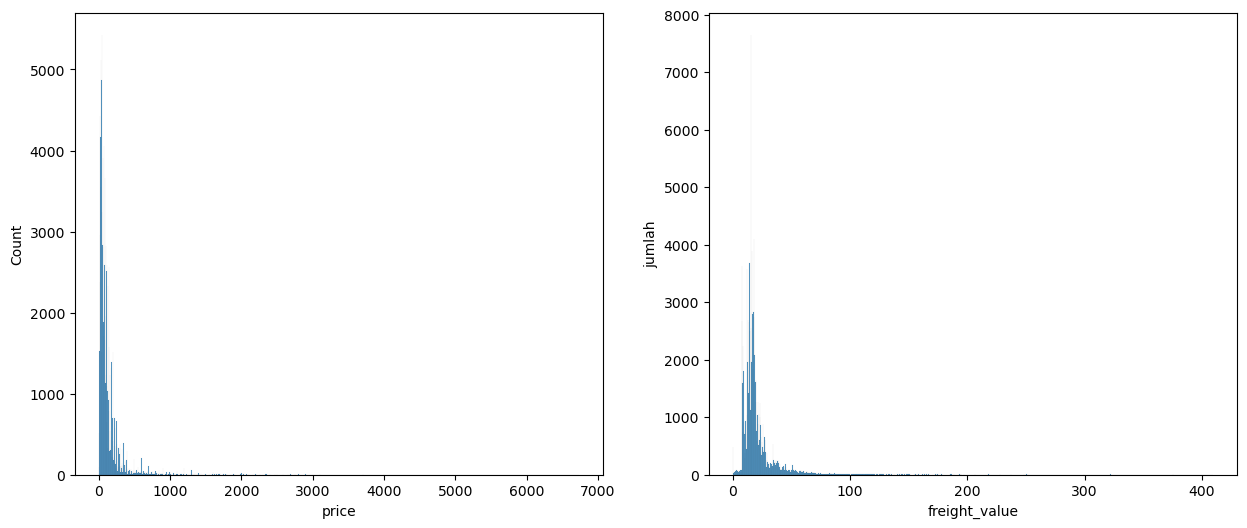

In [23]:
#identifikasi outlier pada kolom price dan freight_value

fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (15,6))

sns.histplot(data=item, x='price', ax= ax[0])
plt.ylabel('jumlah')

sns.histplot(data=item, x='freight_value', ax= ax[1])
plt.ylabel('jumlah')


In [24]:
#handling outlier price
Q1_price = item.price.quantile(0.25)
Q3_price = item.price.quantile(0.75)

batas_bawah_price = Q1_price - (Q3_price-Q1_price)*1.5
batas_atas_price = Q3_price + (Q3_price-Q1_price)*1.5
item_handling_outlier_price = item
median_price = item['price'].median()
item_handling_outlier_price.loc[item_handling_outlier_price['price'] > batas_atas_price, 'price'] = median_price

# #handling outlier freight_value
Q1_freight_value = item.freight_value.quantile(0.25)
Q3_freight_value = item.freight_value.quantile(0.75)

batas_bawah_freight_value = Q1_freight_value - (Q3_freight_value-Q1_freight_value)*1.5
batas_atas_freight_value = Q3_freight_value + (Q3_freight_value-Q1_freight_value)*1.5
median_freight_value = item['freight_value'].median()

item_handling_outlier_price_n_freight_value = item_handling_outlier_price

item_handling_outlier_price_n_freight_value.loc[item_handling_outlier_price_n_freight_value['freight_value'] > batas_atas_freight_value, 'freight_value'] = median_freight_value

<Axes: xlabel='freight_value', ylabel='Count'>

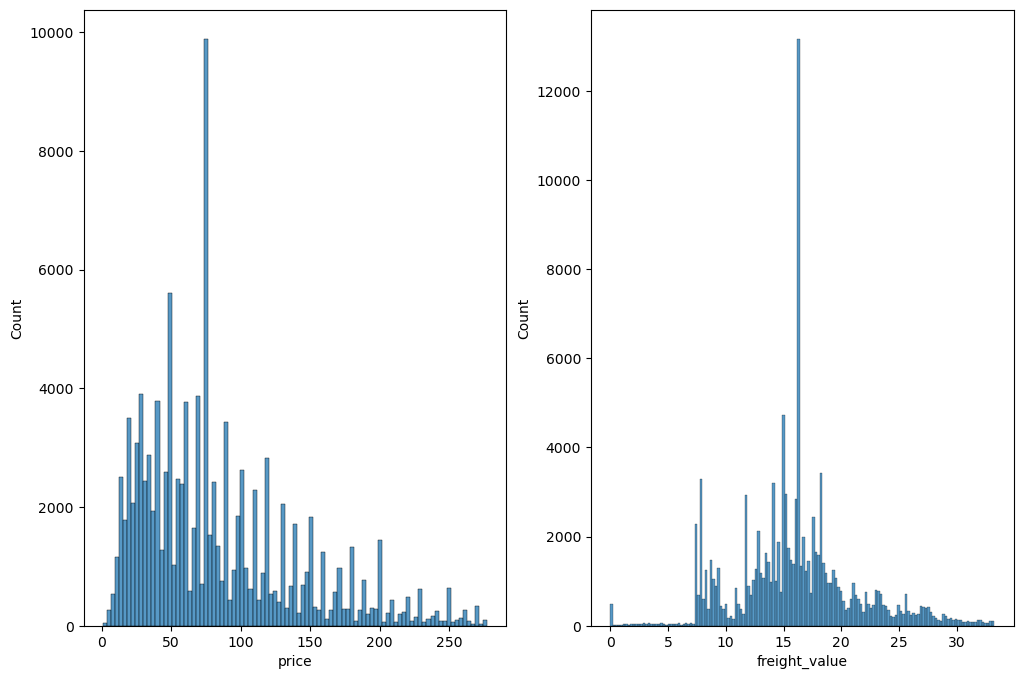

In [25]:
#menampilkan distribusi tabel order items setelah handle outlier
fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (12,8))

sns.histplot(data=item_handling_outlier_price_n_freight_value, x='price', ax= ax[0])

sns.histplot(data=item_handling_outlier_price_n_freight_value, x='freight_value', ax= ax[1])

### 2.3.4 Identifikasi inkonsistensi

In [26]:
item_handling_outlier_price_n_freight_value.head(10)

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,74.99,16.26
8,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [27]:
#cek kolom order_item_id
item_handling_outlier_price_n_freight_value['order_item_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [28]:
items_clean = item_handling_outlier_price_n_freight_value

## 2.4 Payment

In [29]:
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 6 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 103886 non-null  int64  
 1   order_id              103886 non-null  object 
 2   payment_sequential    103886 non-null  int64  
 3   payment_type          103886 non-null  object 
 4   payment_installments  103886 non-null  int64  
 5   payment_value         103886 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ MB


In [30]:
payment.describe(include='all')

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886.00000,103886,103886.000000,103886,103886.000000,103886.000000
unique,NaN,99440,NaN,5,NaN,NaN
top,NaN,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,NaN,29,NaN,76795,NaN,NaN
mean,51942.50000,NaN,1.092679,NaN,2.853349,154.100380
std,29989.44937,NaN,0.706584,NaN,2.687051,217.494064
min,0.00000,NaN,1.000000,NaN,0.000000,0.000000
25%,25971.25000,NaN,1.000000,NaN,1.000000,56.790000
50%,51942.50000,NaN,1.000000,NaN,1.000000,100.000000
75%,77913.75000,NaN,1.000000,NaN,4.000000,171.837500


### 2.4.1 Identifikasi Missing Value

In [31]:
(payment.isna().sum()/len(payment)*100).sort_values(ascending=True)

index                   0.0
order_id                0.0
payment_sequential      0.0
payment_type            0.0
payment_installments    0.0
payment_value           0.0
dtype: float64

### 2.4.2 Identifikasi Duplikasi

In [32]:
payment[payment.duplicated(keep=False)]

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value


### 2.4.3 Identifiikasi Outlier

In [33]:
payment.describe(include='all')

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886.00000,103886,103886.000000,103886,103886.000000,103886.000000
unique,NaN,99440,NaN,5,NaN,NaN
top,NaN,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,NaN,29,NaN,76795,NaN,NaN
mean,51942.50000,NaN,1.092679,NaN,2.853349,154.100380
std,29989.44937,NaN,0.706584,NaN,2.687051,217.494064
min,0.00000,NaN,1.000000,NaN,0.000000,0.000000
25%,25971.25000,NaN,1.000000,NaN,1.000000,56.790000
50%,51942.50000,NaN,1.000000,NaN,1.000000,100.000000
75%,77913.75000,NaN,1.000000,NaN,4.000000,171.837500


terdapat beberapa kolom seperti payment_installments dan payment_value yang dapat menjadi tempat terjadinya outlier

Text(0, 0.5, 'jumlah')

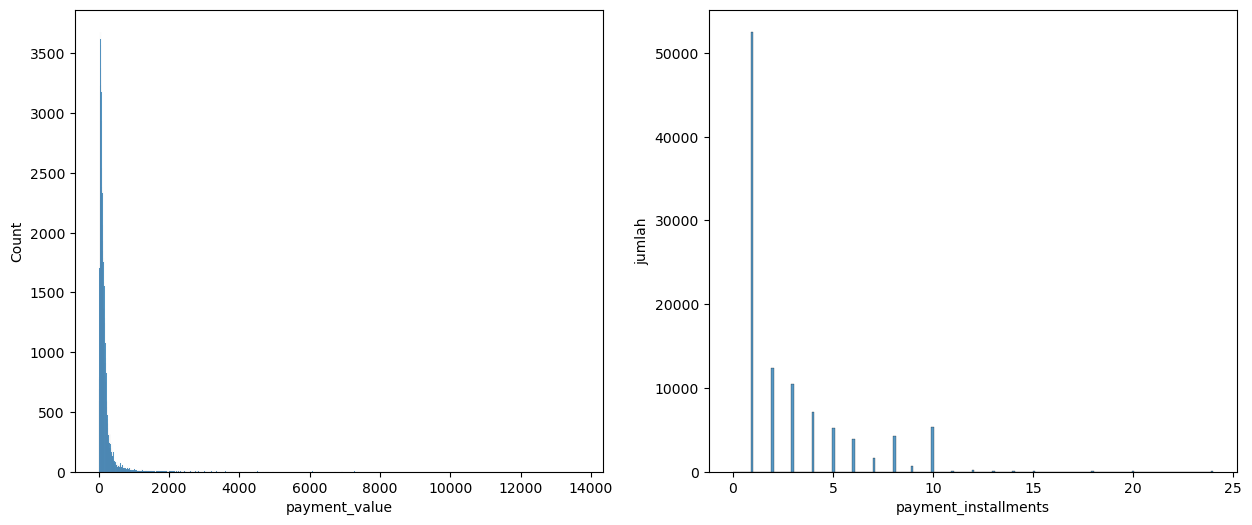

In [34]:
#identifikasi outlier pada kolom price dan freight_value

fig, ax = plt.subplots(ncols=2, nrows=1,figsize = (15,6))

sns.histplot(data=payment, x='payment_value', ax= ax[0])
plt.ylabel('jumlah')

sns.histplot(data=payment, x='payment_installments', ax= ax[1])
plt.ylabel('jumlah')

In [35]:
# Menghitung Q1 dan Q3 untuk kolom 'payment_value' dan 'payment_installments'
Q1_value = payment['payment_value'].quantile(0.25)
Q3_value = payment['payment_value'].quantile(0.75)

Q1_installments = payment['payment_installments'].quantile(0.25)
Q3_installments = payment['payment_installments'].quantile(0.75)

# Menghitung IQR untuk kedua kolom
IQR_value = Q3_value - Q1_value
IQR_installments = Q3_installments - Q1_installments

# Menghitung batas bawah dan batas atas untuk outlier
lower_bound_value = Q1_value - 1.5 * IQR_value
upper_bound_value = Q3_value + 1.5 * IQR_value

lower_bound_installments = Q1_installments - 1.5 * IQR_installments
upper_bound_installments = Q3_installments + 1.5 * IQR_installments

# Mengidentifikasi outlier dalam 'payment_value' dan 'payment_installments'
outliers_value = payment[(payment['payment_value'] < lower_bound_value) | (payment['payment_value'] > upper_bound_value)]
outliers_installments = payment[(payment['payment_installments'] < lower_bound_installments) | (payment['payment_installments'] > upper_bound_installments)]

payment_handling_outlier = payment[~(payment['payment_value'].isin(outliers_value['payment_value'])) & ~(payment['payment_installments'].isin(outliers_installments['payment_installments']))]



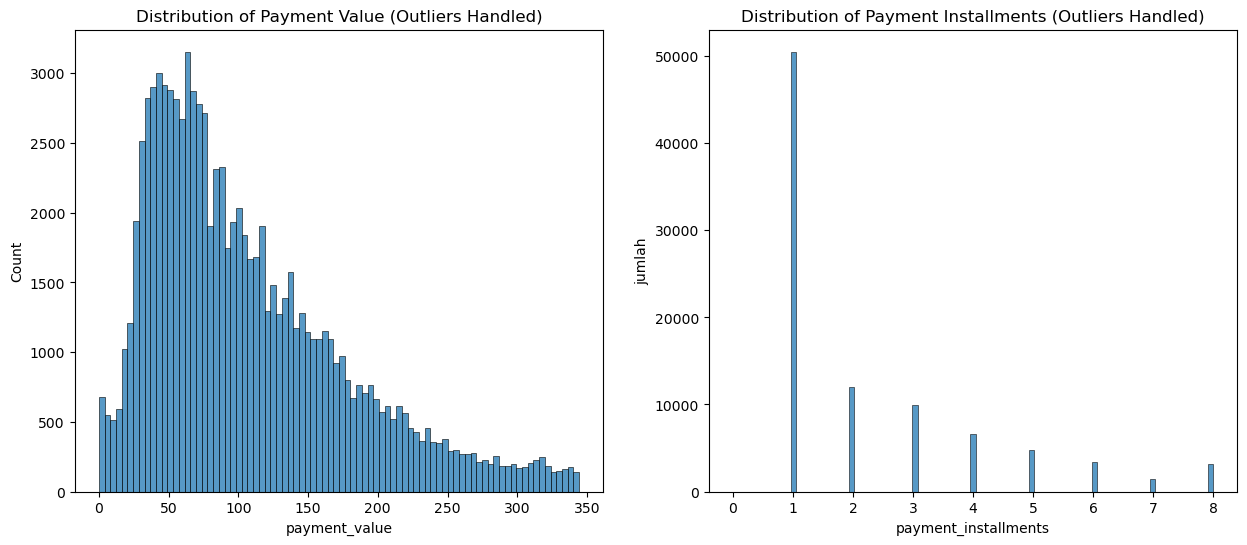

In [36]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 6))

# Visualisasi 'payment_value' setelah mengatasi outlier
sns.histplot(data=payment_handling_outlier, x='payment_value', ax=ax[0])
plt.ylabel('jumlah')
ax[0].set_title('Distribution of Payment Value (Outliers Handled)')


# Visualisasi 'payment_installments' setelah mengatasi outlier
sns.histplot(data=payment_handling_outlier, x='payment_installments', ax=ax[1])
plt.ylabel('jumlah')
ax[1].set_title('Distribution of Payment Installments (Outliers Handled)')

plt.show()

In [37]:
#cek tabel payments
payment_handling_outlier

,index,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103879,103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


In [38]:
payment_clean = payment_handling_outlier

## 2.5 Produk

In [39]:
#cek info
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       32951 non-null  int64  
 1   product_id                  32951 non-null  object 
 2   product_category_name       32341 non-null  object 
 3   product_name_lenght         32341 non-null  float64
 4   product_description_lenght  32341 non-null  float64
 5   product_photos_qty          32341 non-null  float64
 6   product_weight_g            32949 non-null  float64
 7   product_length_cm           32949 non-null  float64
 8   product_height_cm           32949 non-null  float64
 9   product_width_cm            32949 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ MB


In [40]:
#cek describe
product.describe(include='all')

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,NaN,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16475.000000,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,9512.278697,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,0.000000,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,8237.500000,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,16475.000000,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,24712.500000,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


### 2.5.1 Identifikasi Missing Value

In [41]:
#identifikasi missing value
(product.isna().sum()/len(product)*100).sort_values(ascending=False)

product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
index                         0.000000
product_id                    0.000000
dtype: float64

In [42]:
#menampilkan tabel yang terdapat missing values
products_missing = product[product.isnull().any(axis=1)]
products_missing.head(10)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,105,a41e356c76fab66334f36de622ecbd3a,None,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,128,d8dee61c2034d6d075997acef1870e9b,None,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,145,56139431d72cd51f19eb9f7dae4d1617,None,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,154,46b48281eb6d663ced748f324108c733,None,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,197,5fb61f482620cb672f5e586bb132eae9,None,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,244,e10758160da97891c2fdcbc35f0f031d,None,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,294,39e3b9b12cd0bf8ee681bbc1c130feb5,None,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,299,794de06c32a626a5692ff50e4985d36f,None,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,347,7af3e2da474486a3519b0cba9dea8ad9,None,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,428,629beb8e7317703dcc5f35b5463fd20e,None,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


Data yang ditampilkan memiliki beberapa nilai yang hilang (missing values) dalam beberapa kolom. Berikut adalah kolom-kolom yang memiliki missing values:

a. product_category_name: Terdapat nilai "None" yang mungkin merupakan representasi dari nilai yang hilang.

In [43]:
#drop data yang terdapat missing values
products_missing = product.dropna()

In [44]:
#identifikasi missing value
(products_missing.isna().sum()/len(product)*100).sort_values(ascending=False)

index                         0.0
product_id                    0.0
product_category_name         0.0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: float64

#### 2.5.2 Identifikasi Duplikasi

In [45]:
#identifikasi duplikat
products_missing[products_missing.duplicated(keep=False)]

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


2.5.3 Identifikasi Outlier

In [46]:
products_missing.describe(include='all')

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340,32340,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
unique,NaN,32340,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,16482.169728,NaN,NaN,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,9507.559444,NaN,NaN,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,0.000000,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,8248.750000,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,16479.500000,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,24711.250000,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


2.5.4 Identifikasi Inkonsisten

In [47]:
products_missing.head(15)

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


# 3. Analisa Objektif

## 3.1 Jenis pembayaran apa yang paling banyak digunakan

In [48]:
# grouping tabel payments
metode_pembayaran = payment_clean.groupby('payment_type').agg({'order_id':'count'}).reset_index().sort_values(by= 'order_id', ascending=False)
metode_pembayaran

,payment_type,order_id
1,credit_card,66035
0,boleto,18504
4,voucher,5685
2,debit_card,1444
3,not_defined,3


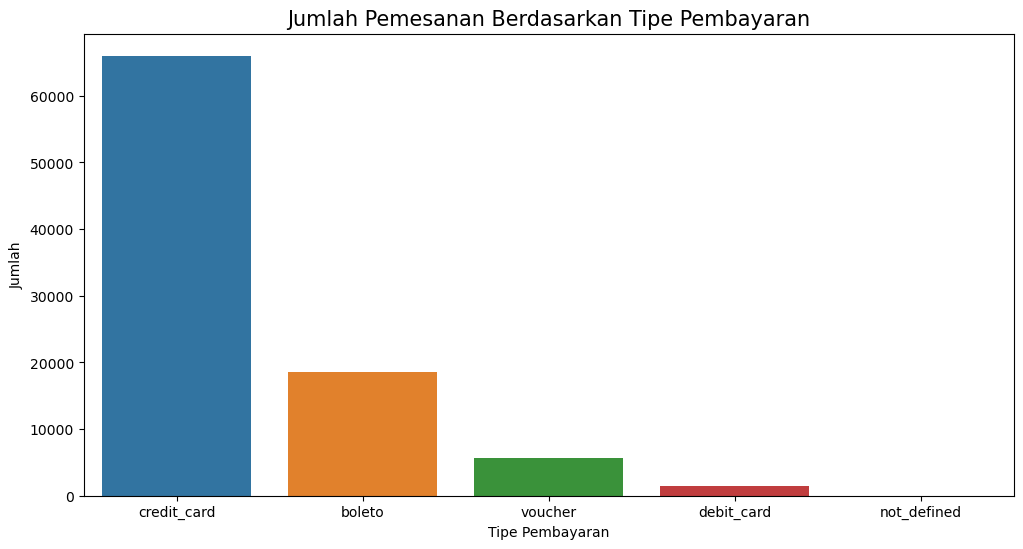

In [49]:
## Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=metode_pembayaran, x='payment_type', y='order_id')
plt.title('Jumlah Pemesanan Berdasarkan Tipe Pembayaran', fontsize=15)
plt.xlabel('Tipe Pembayaran')
plt.ylabel('Jumlah')
plt.show()

## 3.2 Tren penjualan pada tahun 2018

In [50]:
#Menggabungkan kolom orders, payments dan order items
merge_order_orderItems = pd.merge(order_clean,items_clean, on= 'order_id')
merge_order_orderItems_payments = pd.merge(merge_order_orderItems, payment_clean, on= 'order_id')

#memilih kolom kolom yang ditampilkan
merge_order_orderItems_payments = merge_order_orderItems_payments[['order_id','order_status','order_purchase_timestamp','price','freight_value','payment_type','payment_value']]
merge_order_orderItems_payments.head(5)

,order_id,order_status,order_purchase_timestamp,price,freight_value,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,credit_card,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,29.99,8.72,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,118.70,22.76,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,159.90,19.22,credit_card,179.12


In [51]:
# Menambahkan kolom 'month' berdasarkan 'order_purchase_timestamp'
merge_order_orderItems_payments['month'] = merge_order_orderItems_payments['order_purchase_timestamp'].dt.to_period('M')

# Filter data hanya untuk tahun 2018
data_2018 = merge_order_orderItems_payments.loc[merge_order_orderItems_payments['order_purchase_timestamp'].dt.year == 2018]

# Mengelompokkan data berdasarkan bulan dan menghitung total penjualan
total_penjualan_2018 = data_2018.groupby('month')['payment_value'].sum()

# Membuat DataFrame untuk hasil pengelompokan
df_total_penjualan_2018 = total_penjualan_2018.reset_index()
df_total_penjualan_2018.columns = ['Bulan', 'Total_Penjualan']
df_total_penjualan_2018['Bulan'] = df_total_penjualan_2018['Bulan'].dt.to_timestamp()
df_total_penjualan_2018

,Bulan,Total_Penjualan
0,2018-01-01,830333.33
1,2018-02-01,773952.33
2,2018-03-01,817400.36
3,2018-04-01,825610.01
4,2018-05-01,823185.39
5,2018-06-01,737668.06
6,2018-07-01,720668.68
7,2018-08-01,709160.13


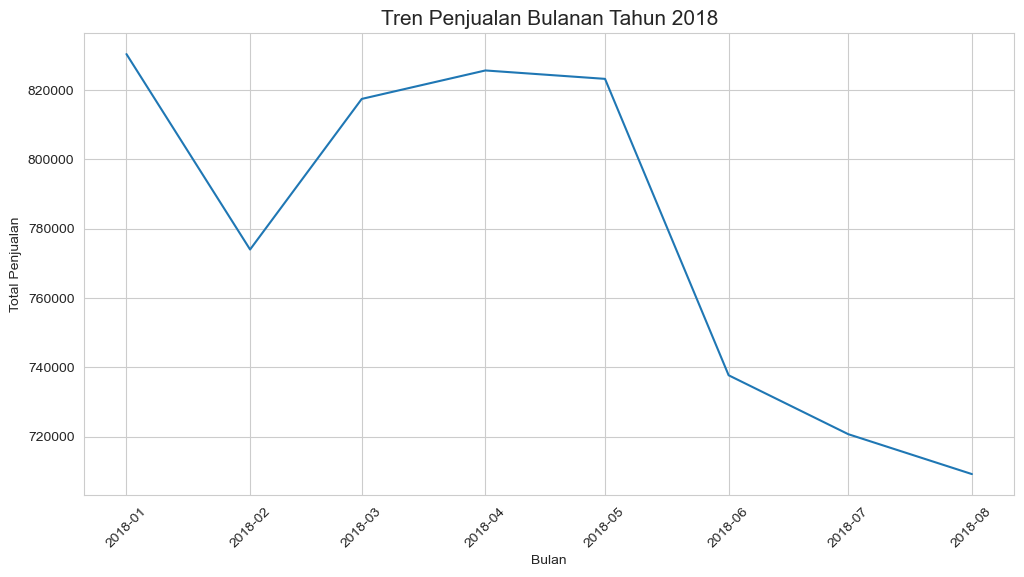

In [52]:
# visualisasi
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_total_penjualan_2018, x='Bulan', y='Total_Penjualan')
plt.title('Tren Penjualan Bulanan Tahun 2018', fontsize=15)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()



## 3.3 Lima kategori penjualan produk terendah dan tertinggi

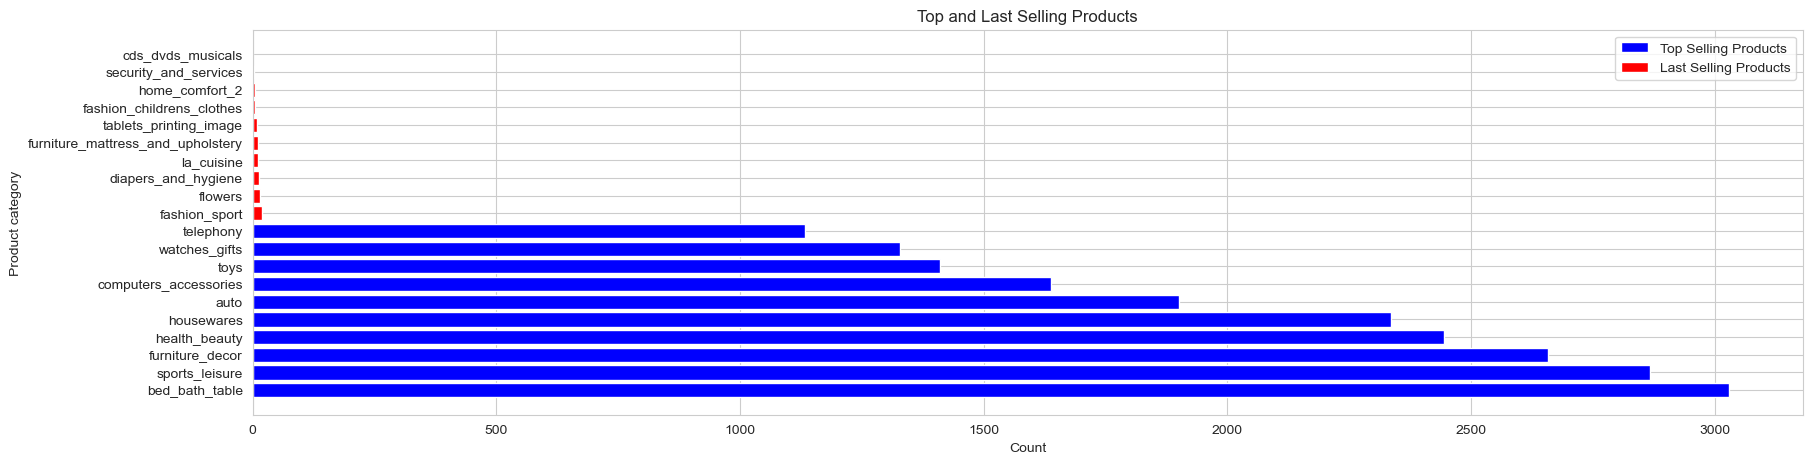

In [53]:
merge_product_category = product.merge(category, on="product_category_name")

# prepare data
top_selling_products = merge_product_category["product_category_name_english"].value_counts().to_frame()
top_selling_products = top_selling_products.reset_index().rename(columns={"index":"product_category", "product_category_name_english":"count"})
top = top_selling_products.head(10)
last = top_selling_products.tail(10)

# visualize data
plt.figure(figsize=(20, 5))
plt.barh(top["product_category"], top["count"], color='blue', label='Top Selling Products')
plt.barh(last["product_category"], last["count"], color='red', label='Last Selling Products')
plt.title("Top and Last Selling Products")
plt.xlabel("Count")
plt.ylabel("Product category")
plt.legend()
plt.show()